# Experiment Demo

We aims to reproduce the figure 2 in Li & Ye 2021 

## Left Panel in Figure 2

m = 4, n = \[25, 50, 100, 250, 500\], Random Input I

In [1]:
# import pacakges
import numpy as np
from Source.env import RandomInputI
from Source.agent import NoNeedtoLearn, SimplifiedDynamicLearning, ActionHistoryDependentLearning
from scipy.optimize import linprog
from tqdm import tqdm

# numeric setting
m = 4
n_ = [25, 50, 100, 250, 500]
d = 0.25
random_seed = 0

In [2]:
# conduct the experiment
n_experiment = 10
reward_noneed = np.zeros((n_experiment, len(n_)))
reward_simplified = np.zeros((n_experiment, len(n_)))
reward_dependent = np.zeros((n_experiment, len(n_)))
reward_opt = np.zeros((n_experiment, len(n_))) # offline benchmark

for exp_index in tqdm(range(n_experiment)):
# for exp_index in range(n_experiment):
    for ii, n in enumerate(n_):
        b = d * np.ones(m) * n

        # No-Need-to-Learn
        env = RandomInputI(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = NoNeedtoLearn(m=m, n=n, b=b, input_name="RandomInputI")
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_noneed[exp_index, ii] = np.sum(agent.reward_)

        # offline linear benchmark
        a = env.a
        r = env.r
        res = linprog(c=-r, A_ub=a, b_ub=b, bounds = [(0.0, 1.0)] * n)
        reward_opt[exp_index, ii] = -res.fun
        
        # Simplified
        env = RandomInputI(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = SimplifiedDynamicLearning(m=m, n=n, b=b)
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_simplified[exp_index, ii] = np.sum(agent.reward_)
        
        # Dependent
        env = RandomInputI(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = ActionHistoryDependentLearning(m=m, n=n, b=b)
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_dependent[exp_index, ii] = np.sum(agent.reward_)
        
        # print(f"{n} done")

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [06:41<00:00, 40.17s/it]


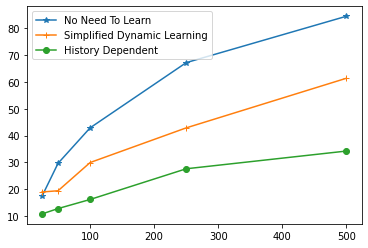

In [3]:
import matplotlib.pyplot as plt

regret_noneed = reward_opt - reward_noneed
regret_simplified = reward_opt - reward_simplified
regret_dependent = reward_opt - reward_dependent

regret_noneed_mean = np.mean(regret_noneed, axis=0)
regret_simplified_mean = np.mean(regret_simplified, axis=0)
regret_dependent_mean = np.mean(regret_dependent, axis=0)

plt.plot(n_, regret_noneed_mean, label="No Need To Learn", marker="*")
plt.plot(n_, regret_simplified_mean, label="Simplified Dynamic Learning", marker="+")
plt.plot(n_, regret_dependent_mean, label="History Dependent", marker="o")
plt.legend()
plt.show()

## Right Panel in Figure 2

m = 4, n = \[25, 50, 100, 250, 500\], Random Input I

In [2]:
# import pacakges
import numpy as np
from Source.env import RandomInputII
from Source.agent import NoNeedtoLearn, SimplifiedDynamicLearning, ActionHistoryDependentLearning
from scipy.optimize import linprog
from tqdm import tqdm

# numeric setting
m = 4
n_ = [25, 50, 100]
d = 0.25
random_seed = 0

In [3]:
# conduct the experiment
n_experiment = 10
reward_noneed = np.zeros((n_experiment, len(n_)))
reward_simplified = np.zeros((n_experiment, len(n_)))
reward_dependent = np.zeros((n_experiment, len(n_)))
reward_opt = np.zeros((n_experiment, len(n_))) # offline benchmark

for exp_index in tqdm(range(n_experiment)):
# for exp_index in range(n_experiment):
    for ii, n in enumerate(n_):
        b = d * np.ones(m) * n

        # No-Need-to-Learn
        env = RandomInputII(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = NoNeedtoLearn(m=m, n=n, b=b, input_name="RandomInputII")
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_noneed[exp_index, ii] = np.sum(agent.reward_)

        # offline linear benchmark
        a = env.a
        r = env.r
        res = linprog(c=-r, A_ub=a, b_ub=b, bounds = [(0.0, 1.0)] * n)
        reward_opt[exp_index, ii] = -res.fun
        
        # Simplified
        env = RandomInputII(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = SimplifiedDynamicLearning(m=m, n=n, b=b)
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_simplified[exp_index, ii] = np.sum(agent.reward_)
        
        # Dependent
        env = RandomInputII(m=m, n=n, b=b, random_seed=random_seed + exp_index)
        agent = ActionHistoryDependentLearning(m=m, n=n, b=b)
        while not env.if_stop():
            r_t, a_t = env.deal()
            action = agent.action(r_t=r_t, a_t=a_t)
            env.observe(action)
        reward_dependent[exp_index, ii] = np.sum(agent.reward_)
        
        # print(f"{n} done")

  0%|                                                                                           | 0/10 [00:00<?, ?it/s]E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Li-Ye-2021-Online_Linear_Programming_Dual_Convergence_New_Algorithms_and_Regret_Bounds\Source\agent.py:159: OptimizeWarning: Solving system with option 'cholesky':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'cholesky' to False.
  res = linprog(c=c, A_ub=Aub, b_ub=bub)
E:\工作事务\个人工作\学术研究\Online-Learning-Implementation\Li-Ye-2021-Online_Linear_Programming_Dual_Convergence_New_Algorithms_and_Regret_Bounds\Source\agent.py:159: OptimizeWarning: Solving system with option 'sym_pos':True failed. It is normal for this to happen occasionally, especially as the solution is approached. However, if you see this frequently, consider setting option 'sym_pos' to False.
  res = linprog(c=c, A_ub=Aub, b_ub=bub)
E:\AllSoftw

 20%|████████████████▌                                                                  | 2/10 [00:18<01:13,  9.18s/it]E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=3.61216e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=5.67618e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.26826e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=7.67793e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-

E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.43134e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
 30%|████████████████████████▉                                                          | 3/10 [00:28<01:05,  9.38s/it]E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.90324e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.8091e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=6.91581e-21): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-p

E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.16288e-18): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.10454e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=8.32539e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.31933e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.51991e-18): result may not b

E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=8.368e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.27841e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=2.21502e-19): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.95428e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=8.33567e-21): result may not be 

E:\AllSoftware\Anaconda\lib\site-packages\scipy\optimize\_linprog_ip.py:117: LinAlgWarning: Ill-conditioned matrix (rcond=1.43937e-20): result may not be accurate.
  return sp.linalg.solve(M, r, sym_pos=sym_pos)
100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:28<00:00,  8.88s/it]


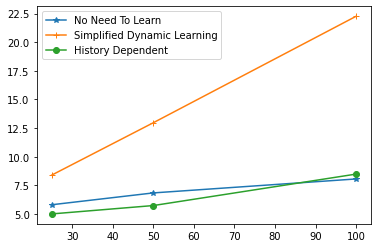

In [4]:
import matplotlib.pyplot as plt

regret_noneed = reward_opt - reward_noneed
regret_simplified = reward_opt - reward_simplified
regret_dependent = reward_opt - reward_dependent

regret_noneed_mean = np.mean(regret_noneed, axis=0)
regret_simplified_mean = np.mean(regret_simplified, axis=0)
regret_dependent_mean = np.mean(regret_dependent, axis=0)

plt.plot(n_, regret_noneed_mean, label="No Need To Learn", marker="*")
plt.plot(n_, regret_simplified_mean, label="Simplified Dynamic Learning", marker="+")
plt.plot(n_, regret_dependent_mean, label="History Dependent", marker="o")
plt.legend()
plt.show()